# Section 8: Coded comments analysis and possible botfights

This is a data analysis script used to produce findings in the paper, which you can run based entirely off the files in this GitHub repository. 

This entire notebook can be run from the beginning with Kernel -> Restart & Run All in the menu bar. It takes about 2 minutes to run on a laptop running a Core i5-2540M processor.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime.now()

In [3]:
!unxz --keep --force ../../datasets/parsed_dataframes/df_all_comments_parsed_2016.pickle.xz

In [4]:
with open("../../datasets/parsed_dataframes/df_all_comments_parsed_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

In [5]:
len(df_all)

924945

In [6]:
df_all[0:2].transpose()

,0,1
archived,False,False
language,fr,fr
page_namespace,0,0
rev_deleted,False,False
rev_id,88656915,70598552
rev_minor_edit,True,True
rev_page,4419903,412311
rev_parent_id,8.85978e+07,6.75069e+07
rev_revert_offset,1,1
rev_sha1,lgtqatftj6rma9ezkyy56rsqethdoqf,0zw28ur2rlxg207ms6w3krqd4qzozq3


## Filter to articles only

In [7]:
df_all_ns0 = df_all.query("page_namespace == 0")

## Calculate counts and proportions of reverts by bottype and bottype_group for each language

In [8]:
counts_bottype_dict = {}
for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_dict[lang]=pd.concat([type_counts, type_percent], axis=1)
    
counts_bottype_group_dict = {}

for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype_group'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype_group'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_group_dict[lang]=pd.concat([type_counts, type_percent], axis=1)

In [9]:
counts_bottype_group_dict['en']

,count,percent
fixing double redirect,110513,45.15%
interwiki link cleanup -- method1,83718,34.2%
interwiki link cleanup -- method2,37085,15.15%
botfight,3408,1.39%
protection template cleanup,2831,1.16%
not classified,2616,1.07%
category work,1779,0.73%
template work,1273,0.52%
other w/ revert in comment,1009,0.41%
other classified,561,0.23%


In [10]:
prop_bottype_group_df = pd.DataFrame()

In [11]:
pd.set_option('precision',4)

In [12]:
for df in counts_bottype_group_dict.items():
    concat_df = df[1]['percent']
    concat_df.name = df[0] + " %"
    prop_bottype_group_df = pd.concat([prop_bottype_group_df, concat_df], axis=1)

In [13]:
prop_bottype_group_df.fillna("---")

,en %,ja %,fr %,de %,es %,zh %,pt %
botfight,1.39%,---,0.0%,0.03%,0.02%,0.01%,0.0%
category work,0.73%,---,0.48%,0.01%,0.16%,---,---
fixing double redirect,45.15%,0.85%,5.78%,1.8%,14.04%,8.58%,3.14%
interwiki link cleanup -- method1,34.2%,14.5%,17.95%,30.17%,23.56%,34.07%,22.66%
interwiki link cleanup -- method2,15.15%,79.46%,73.25%,65.34%,55.51%,54.89%,69.15%
not classified,1.07%,5.14%,1.82%,2.56%,4.69%,1.85%,4.94%
other classified,0.23%,0.02%,0.71%,0.02%,0.21%,0.01%,0.06%
other w/ revert in comment,0.41%,0.03%,0.01%,0.05%,1.62%,0.6%,0.04%
protection template cleanup,1.16%,---,---,0.02%,---,---,---
template work,0.52%,---,---,0.01%,0.2%,---,---


In [14]:
pd.concat([df[1]['percent'], df[1]['percent']], axis=1)

,pt %,pt %
interwiki link cleanup -- method2,69.15%,69.15%
interwiki link cleanup -- method1,22.66%,22.66%
not classified,4.94%,4.94%
fixing double redirect,3.14%,3.14%
other classified,0.06%,0.06%
other w/ revert in comment,0.04%,0.04%
botfight,0.0%,0.0%


In [15]:
gb_lang_bottype = df_all_ns0.groupby(["language", "bottype"])['revisions_reverted']
gb_lang_bottype_group = df_all_ns0.groupby(["language", "bottype_group"])['revisions_reverted']

In [16]:
gb_lang_bottype.count().unstack().transpose().replace(np.nan,0)

language,de,en,es,fr,ja,pt,zh
bottype,,,,,,,
botfight: 718bot vs ImageRemovalBot,1.0,170.0,0.0,0.0,0.0,0.0,0.0
botfight: Cyberbot II vs AnomieBOT date tagging,0.0,301.0,0.0,0.0,0.0,0.0,0.0
botfight: Russbot vs Cydebot category renaming,10.0,2095.0,0.0,0.0,0.0,0.0,0.0
botfight: infoboxneeded,0.0,98.0,0.0,0.0,0.0,0.0,0.0
botfight: mathbot mathlist updates,0.0,514.0,0.0,0.0,0.0,0.0,0.0
botfight: reverting CommonsDelinker,5.0,230.0,16.0,2.0,0.0,1.0,3.0
category redirect cleanup,1.0,337.0,106.0,0.0,0.0,0.0,0.0
clearing sandbox,0.0,1.0,1.0,2.0,0.0,1.0,0.0
commons image migration,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [17]:
gb_lang_bottype_group.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False)

language,de,en,es,fr,ja,pt,zh
bottype_group,,,,,,,
fixing double redirect,989.0,110513.0,9561.0,3247.0,294.0,1888.0,3690.0
interwiki link cleanup -- method1,16573.0,83718.0,16045.0,10082.0,5042.0,13626.0,14661.0
interwiki link cleanup -- method2,35894.0,37085.0,37801.0,41154.0,27631.0,41576.0,23618.0
botfight,16.0,3408.0,16.0,2.0,0.0,1.0,3.0
protection template cleanup,10.0,2831.0,0.0,0.0,0.0,0.0,0.0
not classified,1405.0,2616.0,3195.0,1025.0,1787.0,2970.0,794.0
category work,8.0,1779.0,106.0,268.0,0.0,0.0,0.0
template work,5.0,1273.0,133.0,0.0,0.0,0.0,0.0
other w/ revert in comment,28.0,1009.0,1101.0,3.0,11.0,26.0,257.0


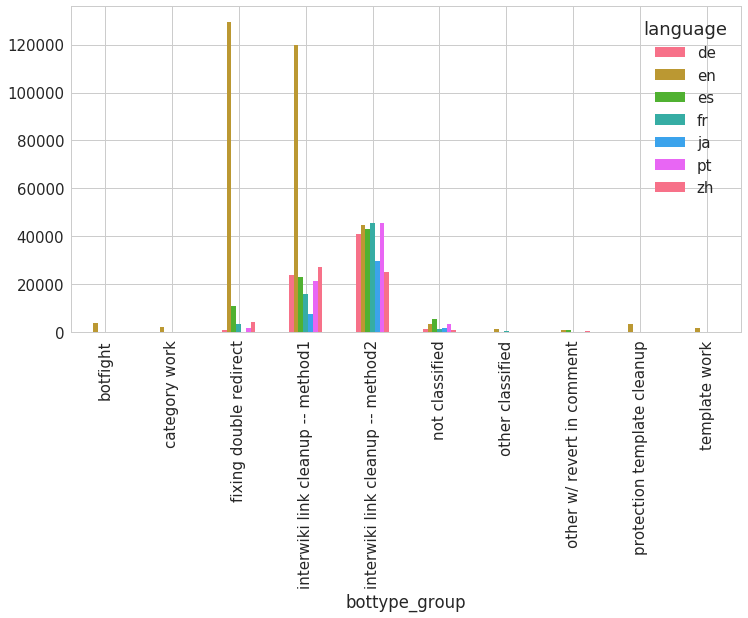

In [18]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")
gb_lang_bottype_group.sum().unstack().transpose().plot(kind='bar', subplots=False, figsize=[12,6])

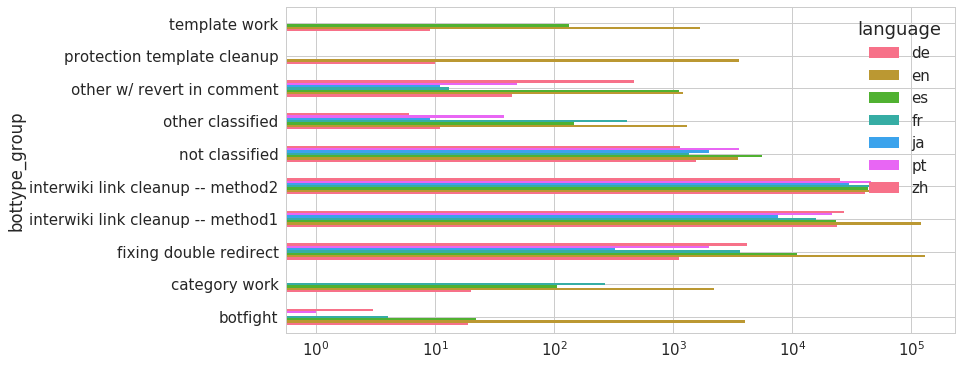

In [19]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")
gb_lang_bottype_group.sum().unstack().transpose().plot(kind='barh', subplots=False, figsize=[12,6])

plt.xscale("log")

## Classified time to revert
### English, articles only

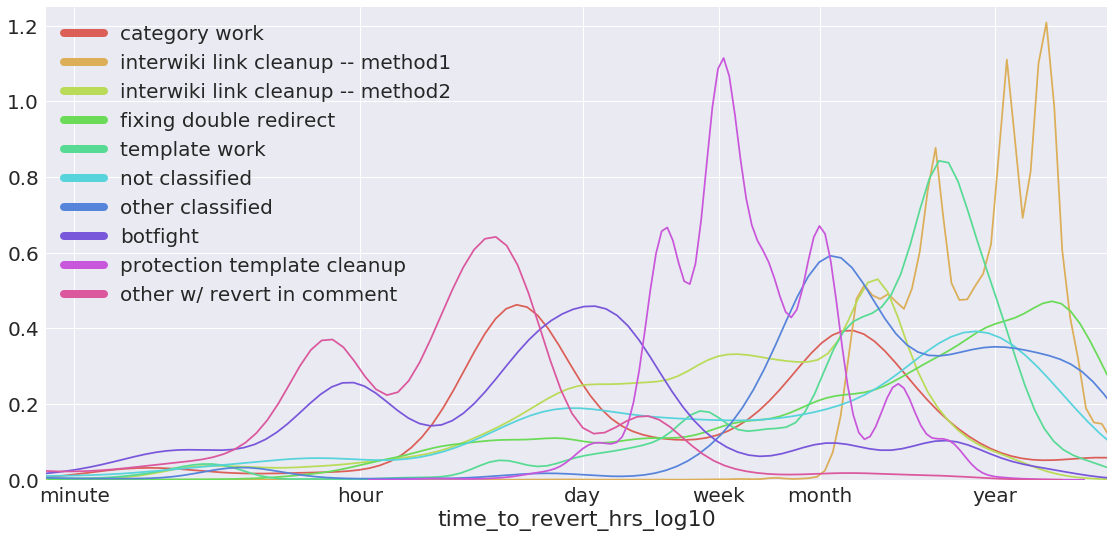

In [20]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0 and language == 'en'"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
g.ax.set_ylim(0,1.25)
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

### All languages, articles only, KDE, combined plot

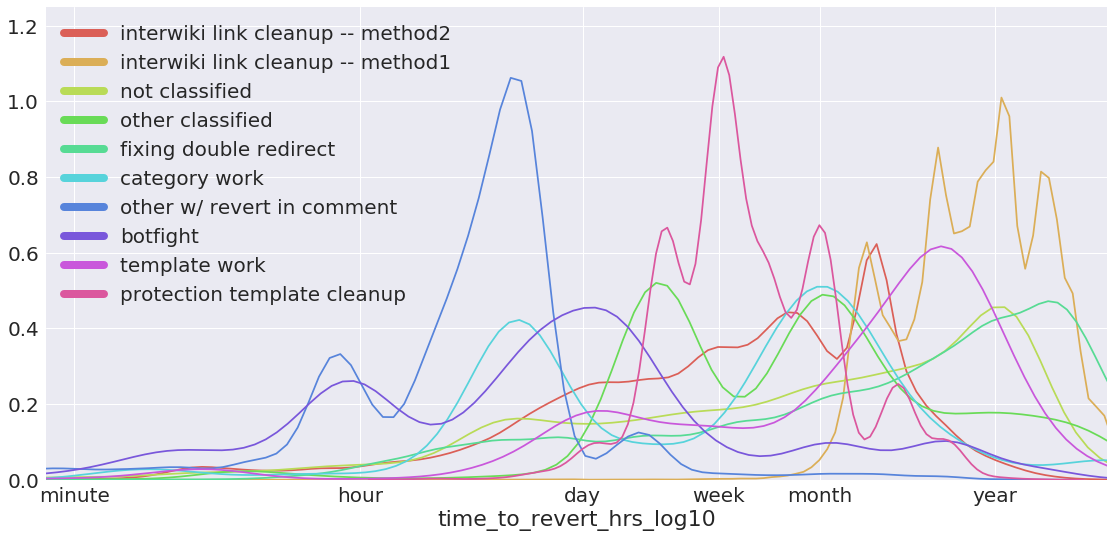

In [21]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
g.ax.set_ylim(0,1.25)
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

### All languages, articles only, panel plot, KDE only

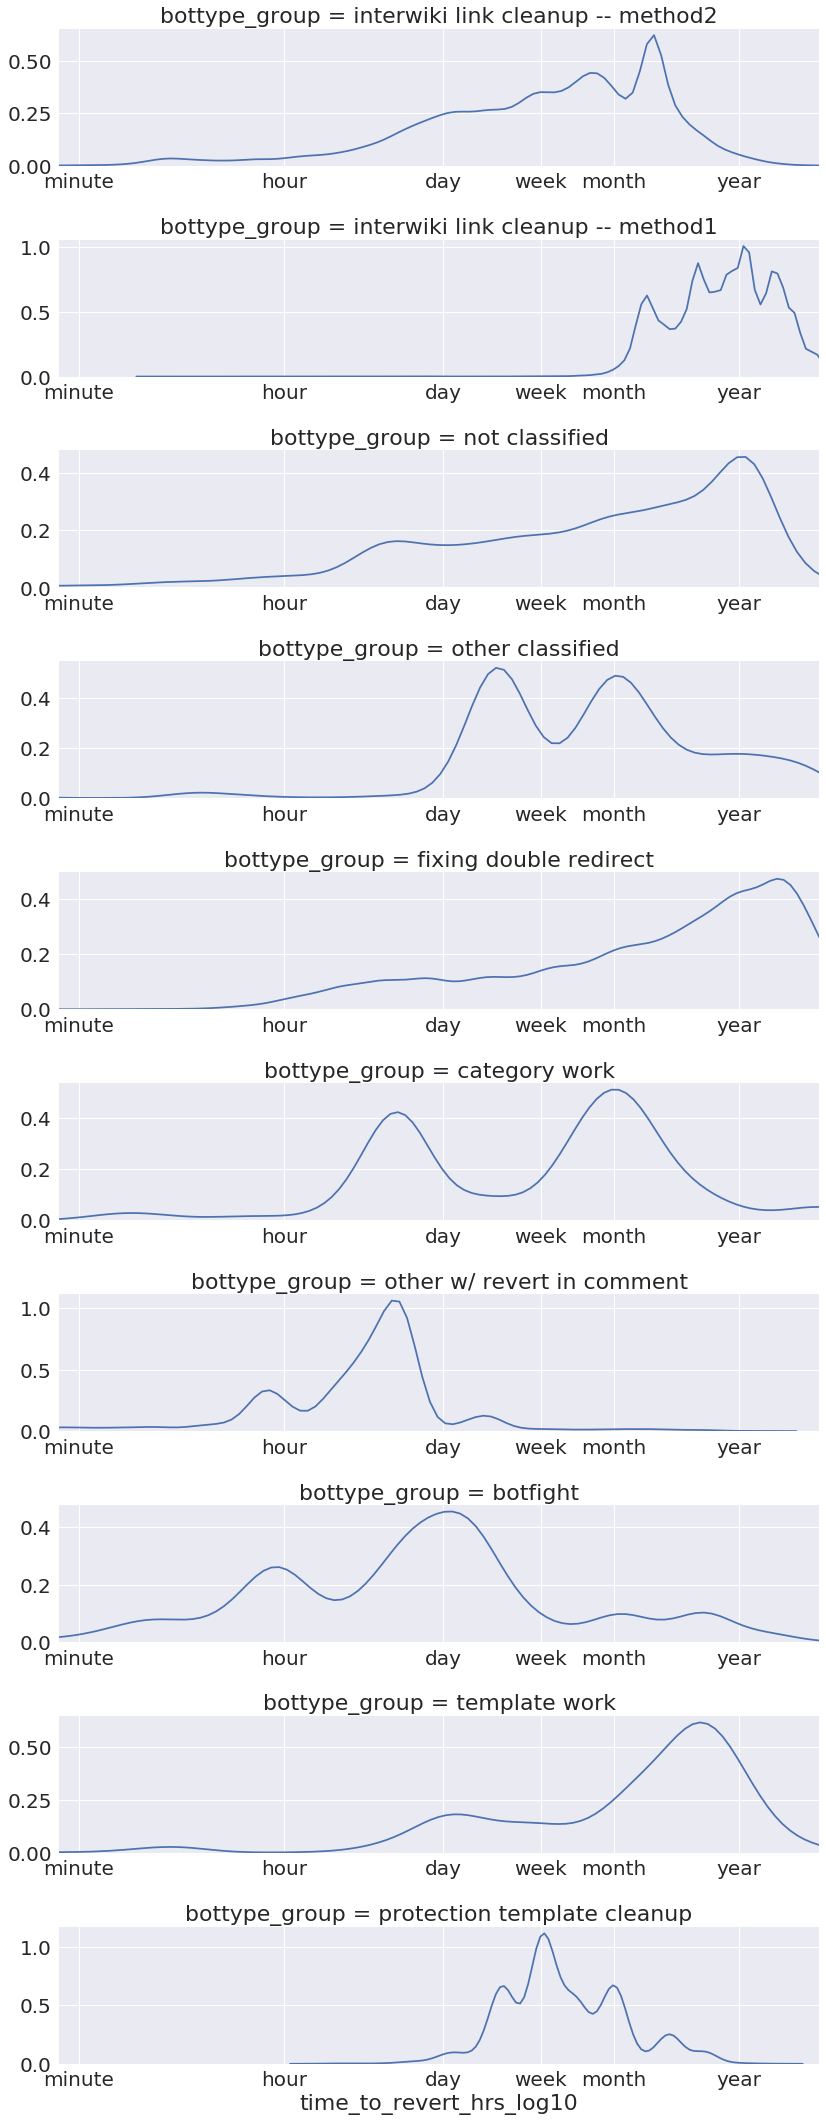

In [22]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, row="bottype_group", size=3, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

### All languages, articles only, paneled plot, KDE and histogram

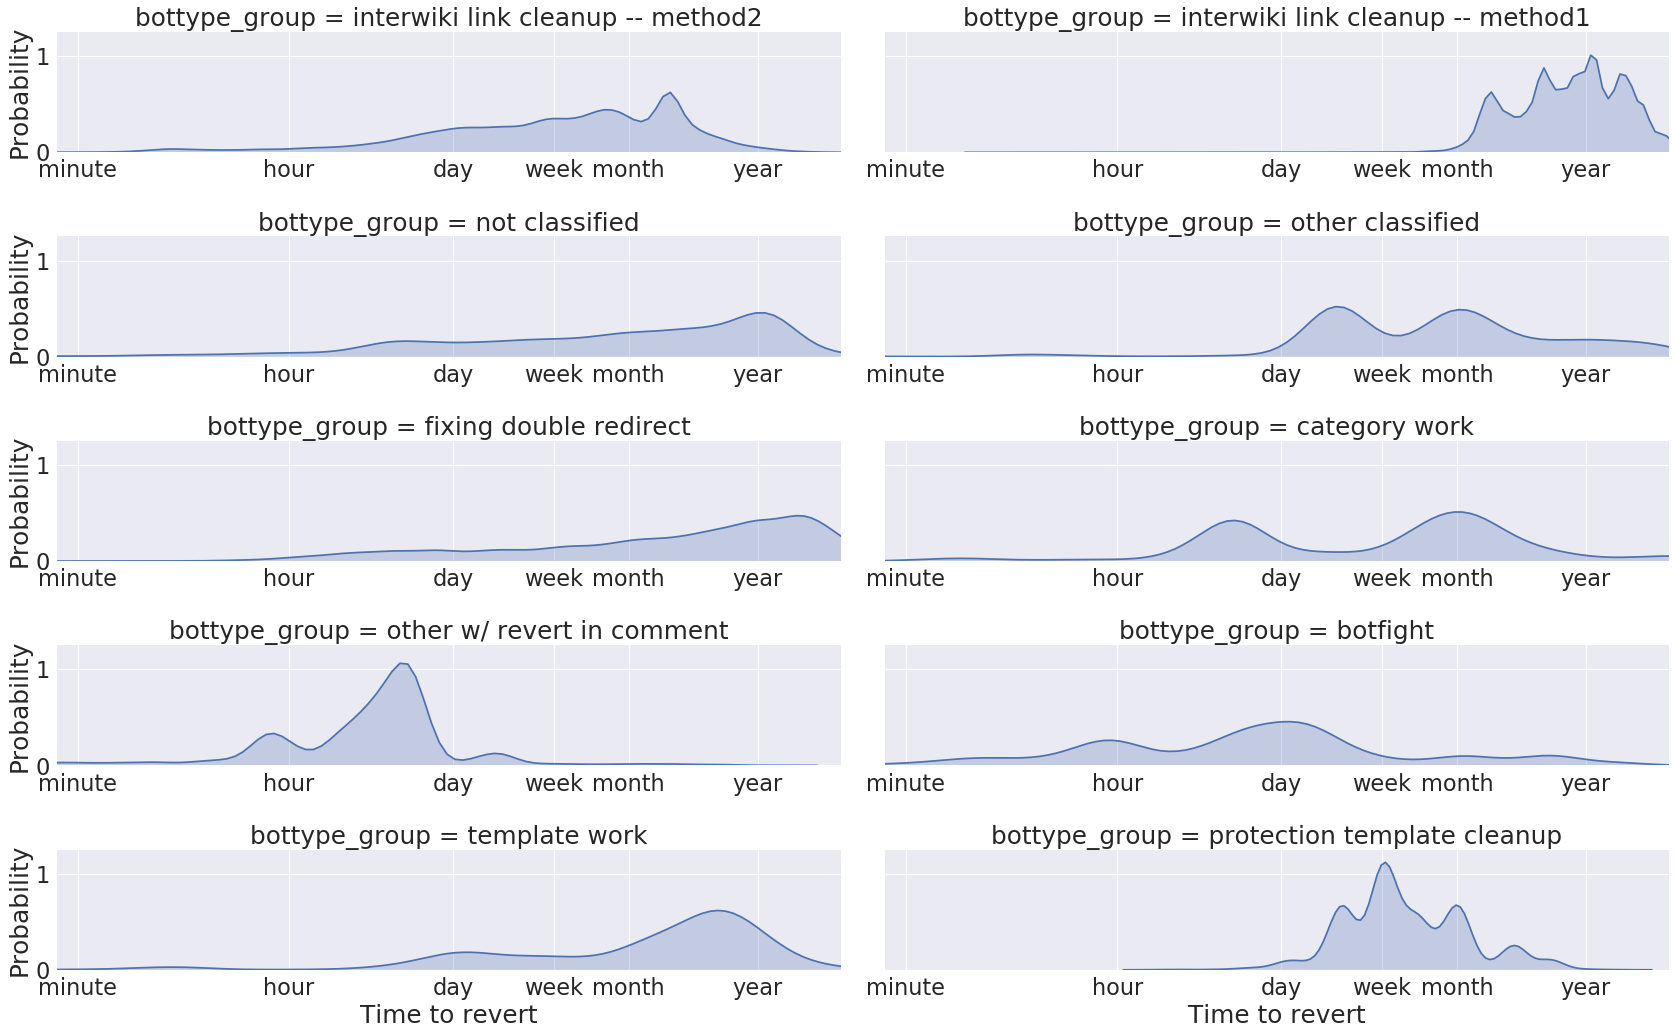

In [23]:
sns.set(font_scale=2.25)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, col="bottype_group", size=3, aspect=4,
                  col_wrap = 2, sharex=False, sharey=True)
g.map(sns.kdeplot, "time_to_revert_hrs_log10", shade=True)

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_ylim(0,1.25)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))
    if ax.colNum == 0:
        ax.set_ylabel("Probability")
    if ax.rowNum == 4:
        ax.set_xlabel("Time to revert")
plt.savefig("ttr-categorized.pdf", dpi=600)

### Mean number of reverts per language per bottype

In [24]:
gb_group_per_page = df_all.query("page_namespace == 0").groupby(["language","bottype_group"])['reverts_per_page_botpair_sorted']

In [25]:
gb_group_per_page.mean().unstack()

bottype_group,botfight,category work,fixing double redirect,interwiki link cleanup -- method1,interwiki link cleanup -- method2,not classified,other classified,other w/ revert in comment,protection template cleanup,template work
language,,,,,,,,,,
de,1.7500,2.7500,1.1598,1.0003,1.1709,1.1246,1.2000,1.0357,1.0000,1.0000
en,6.2444,1.2012,1.1234,1.0000,1.1064,2.6827,4.0909,2.8057,1.1166,1.0259
es,1.0000,1.0000,1.1434,1.0009,1.1155,1.0917,1.0000,1.0154,NaN,1.0000
fr,1.0000,1.0000,1.0339,1.0015,1.1194,1.0946,1.0025,1.6667,NaN,NaN
ja,NaN,NaN,1.0714,1.0030,1.1926,1.0923,1.0000,1.3636,NaN,NaN
pt,1.0000,NaN,1.0694,1.0007,1.1351,1.0609,1.0000,1.1923,NaN,NaN
zh,1.0000,NaN,1.1572,1.0001,1.2060,1.1486,1.3333,1.5136,NaN,NaN


## Possible botfights

### Number of reverts that are possible botfights, per language per bottype

This only includes reverts with `reverts_per_page_botpair_sorted` > 1 (meaning they were not reciprocated by the reverted bot) and where the time to revert was less than 180 days.

In [26]:
df_all_ns0_multiple_reverts = df_all_ns0.query("reverts_per_page_botpair_sorted > 1 and time_to_revert_days < 180")
gb_lang_bottype_group_rr = df_all_ns0_multiple_reverts.groupby(["language", "bottype_group"])['revisions_reverted']

In [27]:
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False)

language,de,en,es,fr,ja,pt,zh
bottype_group,,,,,,,
fixing double redirect,108.0,8925.0,690.0,86.0,20.0,113.0,446.0
interwiki link cleanup -- method2,2906.0,2171.0,2284.0,2567.0,2059.0,2318.0,2169.0
botfight,10.0,1722.0,0.0,0.0,0.0,0.0,0.0
not classified,86.0,355.0,155.0,59.0,145.0,95.0,67.0
category work,6.0,350.0,0.0,0.0,0.0,0.0,0.0
protection template cleanup,0.0,258.0,0.0,0.0,0.0,0.0,0.0
other w/ revert in comment,1.0,168.0,12.0,2.0,4.0,5.0,121.0
other classified,1.0,97.0,0.0,1.0,0.0,0.0,2.0
template work,0.0,33.0,0.0,0.0,0.0,0.0,0.0


Sum by language

In [28]:
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False).sum()

language
de     3120.0
en    14083.0
es     3145.0
fr     2721.0
ja     2232.0
pt     2534.0
zh     2807.0
dtype: float64

Total number of reverts that are part of possible botfights

In [29]:
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False).sum().sum()

30642.0

### Possible botfight plots

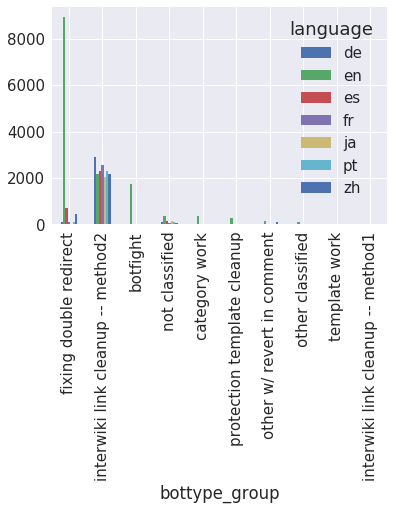

In [30]:
sns.set(font_scale=1.5)
gb_lang_bottype_group_rr.count().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False).plot(kind='bar')

## Export possible botfights

In [31]:
df_all_ns0_multiple_reverts.to_pickle("../../datasets/parsed_dataframes/possible_botfights.pickle")
df_all_ns0_multiple_reverts.to_csv("../../datasets/parsed_dataframes/possible_botfights.tsv", sep="\t")

In [32]:
!xz -9 -e --keep ../../datasets/parsed_dataframes/possible_botfights.pickle
!xz -9 -e --keep ../../datasets/parsed_dataframes/possible_botfights.tsv

xz: ../../datasets/parsed_dataframes/possible_botfights.pickle.xz: File exists
xz: ../../datasets/parsed_dataframes/possible_botfights.tsv.xz: File exists


In [33]:
end = datetime.datetime.now()

time_to_run = end - start
minutes = int(time_to_run.seconds/60)
seconds = time_to_run.seconds % 60
print("Total runtime: ", minutes, "minutes, ", seconds, "seconds")

Total runtime:  1 minutes,  23 seconds
